a0=1.6200000000000003

a1=0.85



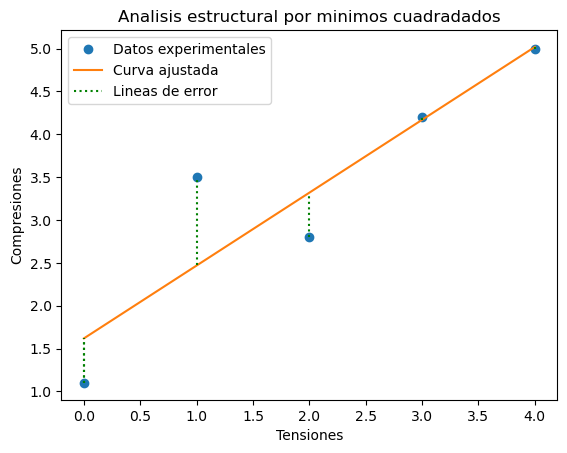

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
def gauss_jordan(A):
    Ab = A
    n = len(Ab)

    for i in range(n):  
        Ab[i]/=Ab[i][i]
        for j in range(i+1, n):
            factor = Ab[j][i]
            Ab[j] -= factor * Ab[i]
        
    for i in range(n-1, -1, -1):
        for j in range(i-1, -1, -1):
            factor = Ab[j][i]
            Ab[j] -= factor * Ab[i]
           
    solucion=[]
    for i in range(0,len(Ab[0])-1):
        solucion.append(Ab[i][len(Ab[0])-1])
    r=0
    for i in solucion:
        print(f"a{r}={str(i)}\n")
        r+=1
    return solucion

#metodo que devuelve la matriz aumentada de coeficientes con las variables a1, a2...,an a resolver
def minimos_cuadrados(x, y, n):
    #array auxiliar que usaremos para llenar las filas de la matriz resultado
    array_auxiliar = np.zeros(n+1, dtype=float)
    resultado = np.zeros((n, n+1), dtype=float)
    # ciclo que va de 0 a n para ir llenando la matriz resultado y el array auxiliar
    for i in range(n):
        #ciclo de 0 a n+1 que llena el array auxiliar en relacion a su posicion
        for j in range(n+1):
            #si i es 0 y j es 0 debemos poner el tamaño del array de datos x en la posicion [0][0] de la matriz resultado
            if i == 0:
                if j == 0:
                    array_auxiliar[j] = len(x)
                #cuando j es igual a n agregamos el termino independiente que seria la suma de el array y
                elif j == n:
                    array_auxiliar[j] = np.sum(y)
                #cuando j es distinto de n y 0 se agrega la suma de el array x elevado al valor de j
                else:
                    array_auxiliar[j] = np.sum(x**j)
            #si i es distinto de 0 sigue su curso normal
            else:
                #en este caso cuando j es igual a n se tiene que agregar el termino independiente pero expresado como la suma de x a la i por y
                if j == n:
                    array_auxiliar[j] = np.sum((x**i) * y)
                #si j es distinto de n se agregan los coeficientes de a0, a1...,an expresados como la suma de x a la i+j
                else:
                    array_auxiliar[j] = np.sum(x**(i+j))
        #se agrega el array auxiliar a las filas de la matriz resultado
        resultado[i] = array_auxiliar
    #se devuelve la matriz resultado al estar llena
    return resultado 
#datos experimentales de tensiones y compresiones            
xi = np.array([0, 1, 2, 3, 4])
yi = np.array([1.1, 3.5, 2.8, 4.2, 5.0])
# Valores para graficar la curva ajustada
datos_x = np.linspace(min(xi), max(xi), 100)
datos_y = np.zeros(len(datos_x))
#variable simbolica x 
x=sym.Symbol("x")
#numero de terminos del polinomio de minimos cuadrados
n=int(input("ingrese los terminos del polinomio: "))
#array que contiene las soluciones de la matriz de coeficientes de a
resolucion= gauss_jordan(minimos_cuadrados(xi,yi,n))
#variable en donde guardaremos el termino del polinomio 
polinomio=0
#ciclo en donde iremos guardando los terminos del polinomio en la variable polinomio
for i in range(0,len(resolucion)):
    if i == 0:
        polinomio+=resolucion[i]
    else:
        polinomio+=resolucion[i]*(x**i)
#ciclo en donde iremos evaluando los puntos de datos_x en el polinomio para obtener los datos_y
for i in range(0,len(datos_y)):
    if isinstance(polinomio, np.float64): 
        datos_y[i]=polinomio
    else:
        datos_y[i]=polinomio.subs(x,datos_x[i])
#polinomio alternativo para graficar las lineas de error
polinomio_error = sym.lambdify(x, polinomio, modules=["numpy"])
#datos_y de las lineas de error
datos_y_error = polinomio_error(datos_x)

#datos de la grafica
plt.plot(xi,yi,'o',label="Datos experimentales")
plt.title("Analisis estructural por minimos cuadradados")
plt.xlabel("Tensiones")
plt.ylabel("Compresiones")
plt.plot(datos_x,datos_y,label="Curva ajustada")
#lineas de error
for i in range(len(xi)):
    y = np.min([yi[i], polinomio_error(xi[i])])
    y2 = np.max([yi[i], polinomio_error(xi[i])])
    plt.vlines(xi[i], y, y2, color='green', linestyle='dotted')
plt.vlines(xi[0], np.min([yi[0], polinomio_error(xi[0])]), np.max([yi[0], polinomio_error(xi[0])]), color='green', linestyle='dotted',label="Lineas de error")
plt.legend()
plt.show()